In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

In [2]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3895074)
# Team-Namen
team1, team2 = df.team_name.unique()
# DataFrame mit allen Schüssen
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

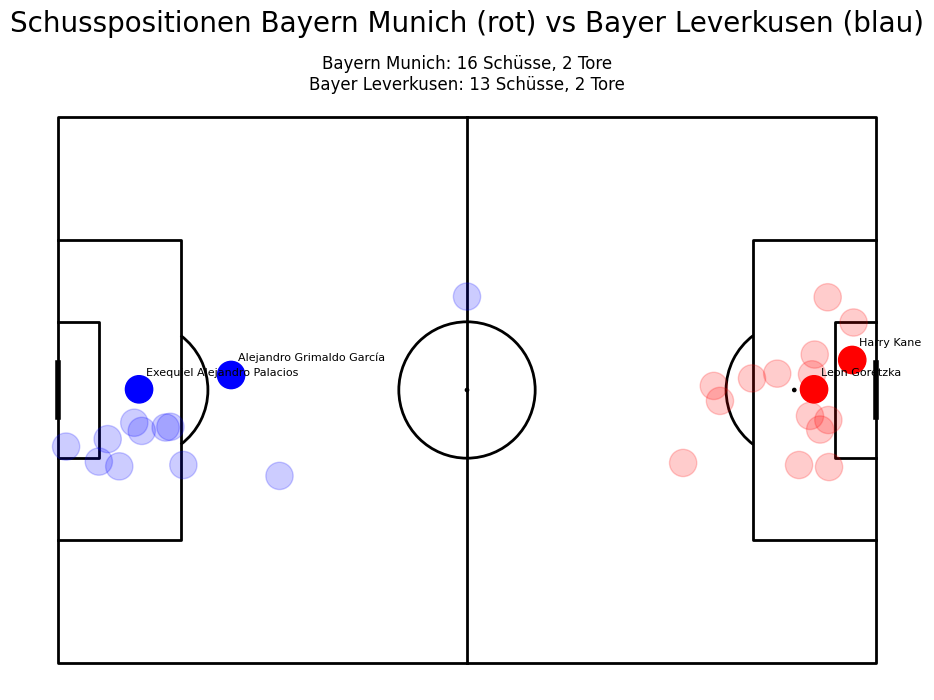

In [7]:
# Anzahl Schüsse und Tore berechnen
shots_team1 = shots[shots['team_name'] == team1]
shots_team2 = shots[shots['team_name'] == team2]

goals_team1 = shots_team1[shots_team1['outcome_name'] == 'Goal']
goals_team2 = shots_team2[shots_team2['outcome_name'] == 'Goal']

n_shots_team1 = len(shots_team1)
n_shots_team2 = len(shots_team2)
n_goals_team1 = len(goals_team1)
n_goals_team2 = len(goals_team2)


pitch = Pitch(line_color = "black")

fig = plt.figure(figsize=(10, 8))

ax = fig.add_axes([0.05, 0.1, 0.9, 0.75]) 

pitch.draw(ax=ax)

pitchLengthX = 120
pitchWidthY = 80

for i, shot in shots.iterrows():
    x = shot['x']
    y = shot['y']
    goal = shot['outcome_name'] == 'Goal'
    team_name = shot['team_name']
    circleSize = 2

    if team_name == team1:
        if goal:
            shotCircle = plt.Circle((x, y), circleSize, color="red")
            ax.text(x+1, y-2, shot['player_name'], fontsize=8)
        else:
            shotCircle = plt.Circle((x, y), circleSize, color="red", alpha=0.2)
    else:
        if goal:
            shotCircle = plt.Circle((pitchLengthX - x, pitchWidthY - y), circleSize, color="blue")
            ax.text(pitchLengthX - x + 1, pitchWidthY - y - 2, shot['player_name'], fontsize=8)
        else:
            shotCircle = plt.Circle((pitchLengthX - x, pitchWidthY - y), circleSize, color="blue", alpha=0.2)
    ax.add_patch(shotCircle)

# Titel und Statistik 
fig.suptitle(f"Schusspositionen {team1} (rot) vs {team2} (blau)", fontsize=20, y=0.95)
stat_text = (
    f"{team1}: {n_shots_team1} Schüsse, {n_goals_team1} Tore\n"
    f"{team2}: {n_shots_team2} Schüsse, {n_goals_team2} Tore"
)
fig.text(0.5, 0.85, stat_text, ha='center', fontsize=12)

plt.show()